In [1]:
import csv
import pandas as pd
import numpy
import time
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
from config import weather_api_key, g_key
from datetime import datetime
import os


In [2]:
file_path = os.path.join("weather_data", "cities.csv")
city_data_df = pd.read_csv(file_path)
city_data_df

,City_ID,City,Date,Lat,Lng,Max Temp,Humidity,Country,Cloudiness,Wind Speed
0,0,Port Elizabeth,2022-03-25 01:11:07,-33.9180,25.5701,64.09,99,ZA,100,10.36
1,1,Lagos,2022-03-25 01:07:29,6.5833,3.7500,81.36,83,NG,100,6.22
2,2,Severo-Kurilsk,2022-03-25 01:11:08,50.6789,156.1250,30.15,67,RU,99,9.95
3,3,Kyabe,2022-03-25 01:11:08,9.4515,18.9449,84.02,40,TD,83,2.30
4,4,Busselton,2022-03-25 01:11:09,-33.6500,115.3333,72.00,41,AU,36,12.84
...,...,...,...,...,...,...,...,...,...,...
572,572,Sanmenxia,2022-03-25 01:27:14,34.7747,111.1814,56.52,66,CN,100,9.51
573,573,Aljezur,2022-03-25 01:27:15,37.3191,-8.8033,51.26,90,PT,79,6.06
574,574,Rocha,2022-03-25 01:27:15,-34.4833,-54.3333,57.31,59,UY,93,8.59
575,575,Martapura,2022-03-25 01:27:17,-3.4167,114.8500,77.09,94,ID,20,0.00


In [3]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [4]:
# Get today's date in seconds
today = time.strftime("%x")
today

'03/24/22'

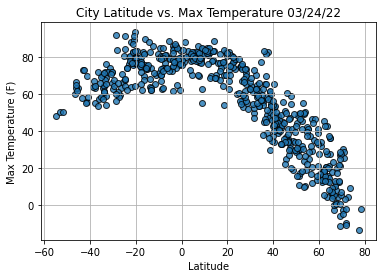

In [5]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

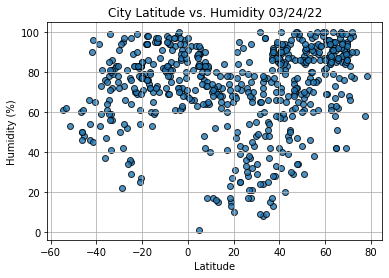

In [6]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

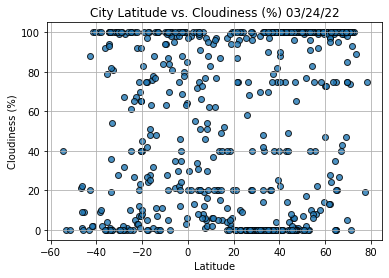

In [7]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

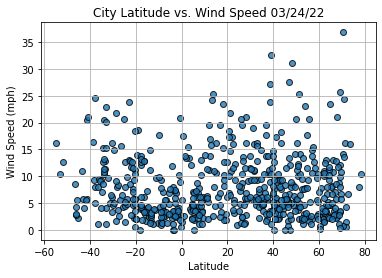

In [8]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [9]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [10]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [11]:
# Perform linear regression (X, Y) - Y is the dependent variable
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [12]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

In [13]:
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

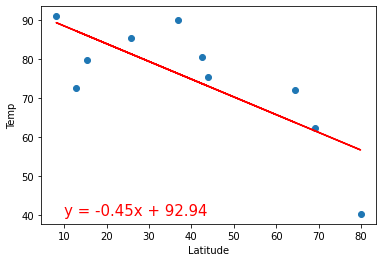

In [14]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
city_data_df

,City_ID,City,Date,Lat,Lng,Max Temp,Humidity,Country,Cloudiness,Wind Speed
0,0,Port Elizabeth,2022-03-25 01:11:07,-33.9180,25.5701,64.09,99,ZA,100,10.36
1,1,Lagos,2022-03-25 01:07:29,6.5833,3.7500,81.36,83,NG,100,6.22
2,2,Severo-Kurilsk,2022-03-25 01:11:08,50.6789,156.1250,30.15,67,RU,99,9.95
3,3,Kyabe,2022-03-25 01:11:08,9.4515,18.9449,84.02,40,TD,83,2.30
4,4,Busselton,2022-03-25 01:11:09,-33.6500,115.3333,72.00,41,AU,36,12.84
...,...,...,...,...,...,...,...,...,...,...
572,572,Sanmenxia,2022-03-25 01:27:14,34.7747,111.1814,56.52,66,CN,100,9.51
573,573,Aljezur,2022-03-25 01:27:15,37.3191,-8.8033,51.26,90,PT,79,6.06
574,574,Rocha,2022-03-25 01:27:15,-34.4833,-54.3333,57.31,59,UY,93,8.59
575,575,Martapura,2022-03-25 01:27:17,-3.4167,114.8500,77.09,94,ID,20,0.00


In [17]:
city_data_df[city_data_df['Lat'] >= 0].head()

,City_ID,City,Date,Lat,Lng,Max Temp,Humidity,Country,Cloudiness,Wind Speed
1,1,Lagos,2022-03-25 01:07:29,6.5833,3.7500,81.36,83,NG,100,6.22
2,2,Severo-Kurilsk,2022-03-25 01:11:08,50.6789,156.1250,30.15,67,RU,99,9.95
3,3,Kyabe,2022-03-25 01:11:08,9.4515,18.9449,84.02,40,TD,83,2.30
5,5,Nemuro,2022-03-25 01:11:09,43.3236,145.5750,32.63,83,JP,14,7.56
6,6,Iqaluit,2022-03-25 01:11:10,63.7506,-68.5145,4.37,92,CA,100,3.00


In [18]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

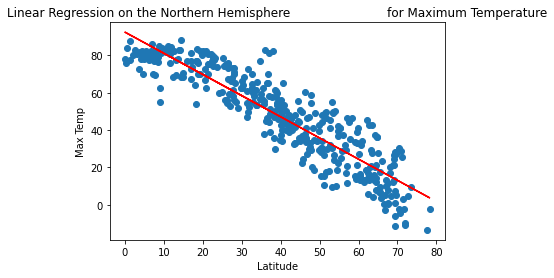

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

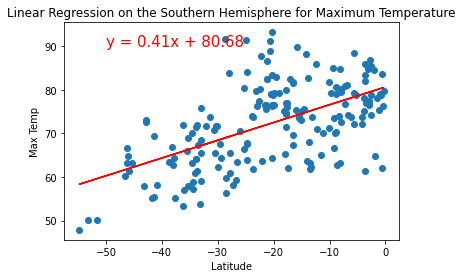

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

# Finding for the last two charts - As we move towards the equator, max temperatures goes up (r value or slope - is significant)

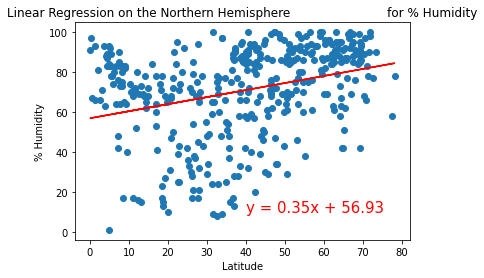

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

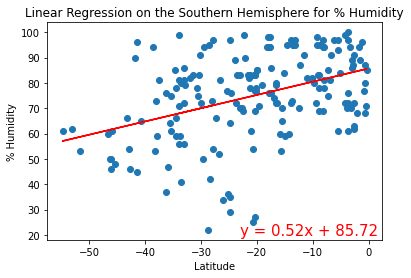

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-23,20))

# because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity

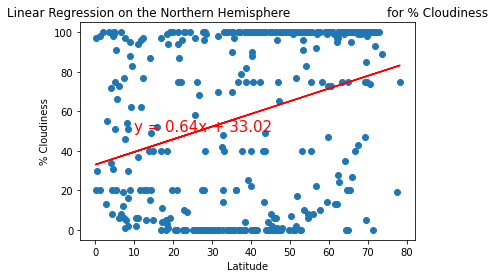

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

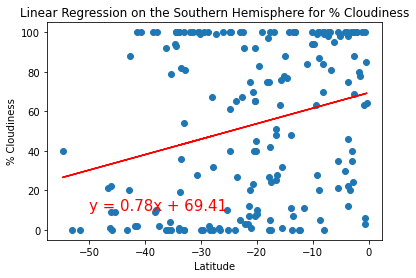

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,10))

# cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness

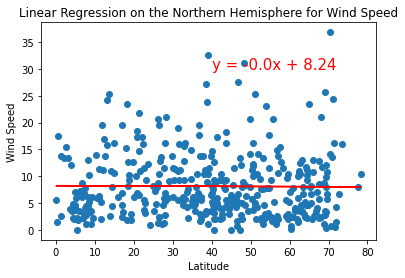

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,30))

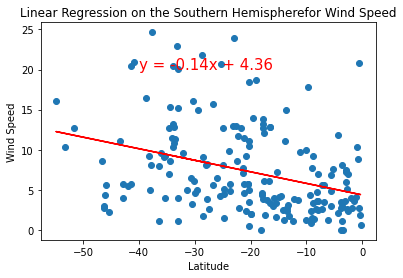

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispherefor Wind Speed', 
                       'Wind Speed',(-40,20))

# wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 

